In [16]:
import src.edhec_risk_kit as erk
import src.funcs as funcs
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


/Users/raghuramshankar/Developer/portfolio-constructor/src/funcs.py:18: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  def build_capm(asset, market, risk_free=pd.Series([]), plot=False):


# Modern Portfolio Theory

In [17]:
tickers = ["VUSA.L", "IDTG.L", "SGLN.L", "HMEF.L", "VHYL.L", "SWLD.L", "ISP6.L"]
end = dt.datetime.now()
start = end - dt.timedelta(days=365*10)
t = funcs.get_t(tickers=tickers, start=start, end=end)
t = t.resample("D").ffill().pct_change().dropna(axis=0)

[*********************100%***********************]  7 of 7 completed


[Text(0, 0.5, 'HMEF.L'),
 Text(0, 1.5, 'IDTG.L'),
 Text(0, 2.5, 'ISP6.L'),
 Text(0, 3.5, 'SGLN.L'),
 Text(0, 4.5, 'SWLD.L'),
 Text(0, 5.5, 'VHYL.L'),
 Text(0, 6.5, 'VUSA.L')]

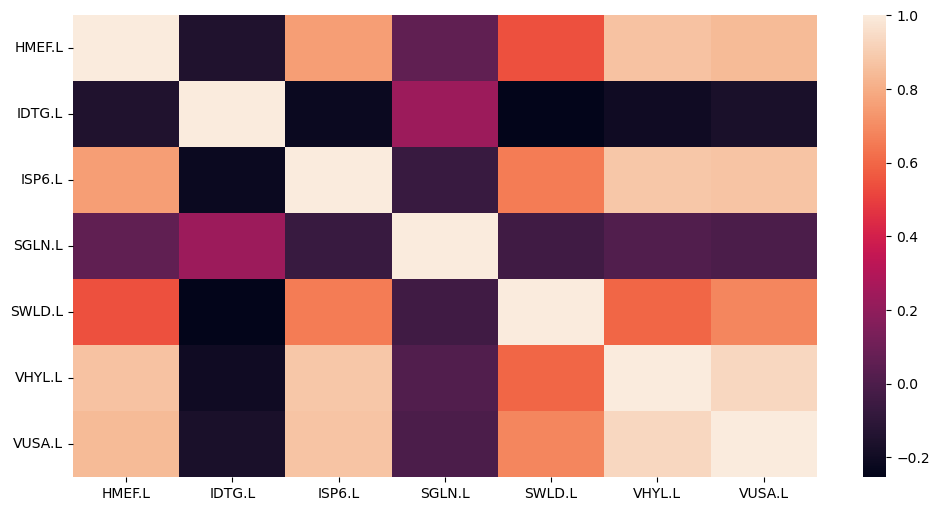

In [18]:
fig = plt.figure(figsize=(12,6))
ax = sns.heatmap(t.corr(), annot=False)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)

In [19]:
erk.terminal_wealth(t)

HMEF.L    0.948663
IDTG.L    0.700446
ISP6.L    1.214441
SGLN.L    1.323443
SWLD.L    1.376259
VHYL.L    1.056926
VUSA.L    1.413563
dtype: float64

## Efficient Frontier

,HMEF.L,IDTG.L,ISP6.L,SGLN.L,SWLD.L,VHYL.L,VUSA.L,Volatility,Return,Sharpe Ratio
Maximum Sharpe Ratio,3.868417e-17,0.000000,2.266429e-16,0.543977,0.438762,2.381979e-16,0.017261,0.020700,0.002736,0.132196
Minimum Volatility,0.000000e+00,0.331446,0.000000e+00,0.300301,0.313573,5.467991e-02,0.000000,0.016785,0.000639,0.038047
Equally Weighted,1.428571e-01,0.142857,1.428571e-01,0.142857,0.142857,1.428571e-01,0.142857,0.029707,0.001031,0.034720


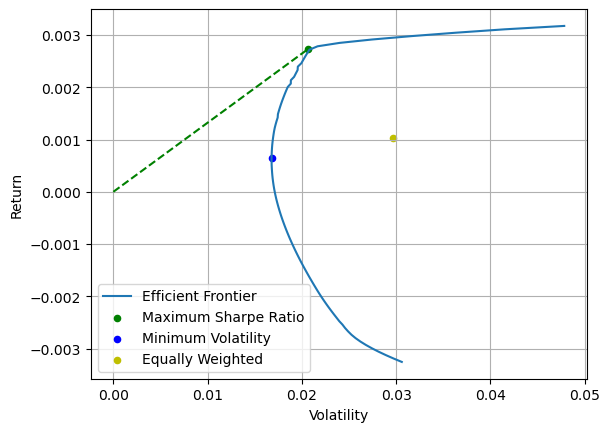

In [20]:
ef, df = erk.efficient_frontier(100, t, t.cov(), 12, plot=True)
df

# Monte Carlo Simulation

In [25]:
t.mean()

HMEF.L    0.000065
IDTG.L   -0.000233
ISP6.L    0.000278
SGLN.L    0.000246
SWLD.L    0.000288
VHYL.L    0.000124
VUSA.L    0.000358
dtype: float64

Text(0, 0.5, 'Portfolio Value')

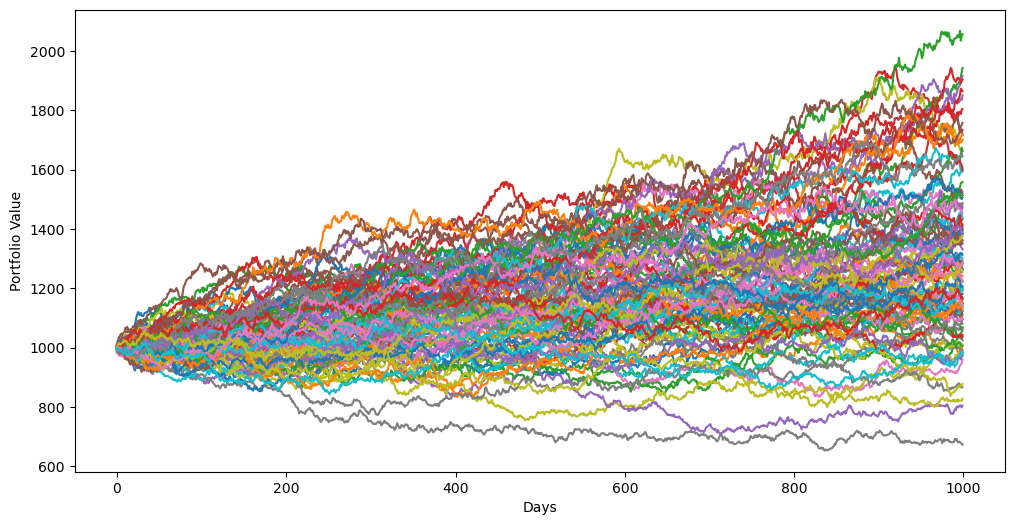

In [28]:
weights = df.loc["Maximum Sharpe Ratio", :][:-3]
mc_results = funcs.monte_carlo_sim(returns=t, weights=weights, mc_sims=100, n_days=1000, portfolio_init=1000)
_,ax = plt.subplots(figsize=(12,6))
ax.plot(mc_results)
ax.set_xlabel("Days")
ax.set_ylabel("Portfolio Value")
